### Feature Selection Based on Univariate ROC_AUC for classification and MSE for Regression

#### What is ROC_AUC?

AUC - ROC curve is a performance measurement for `classification` problem at `various thresholds` settings. ROC is a `probability curve` and AUC represents `degree or measure of separability`. It tells how much model is capable of distinguishing between classes.
- `Higher the AUC, better the model` is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
- The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
- To Plot ROC Curve we design confusion matrix to set different threshold value and then we calculate FPR and TPR using above formula and then plot it. 
<img src='roc_auc.JPG'>

<img src='term.JPG'>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('santander-train.csv',nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X = data.drop('TARGET',axis=1)
y = data.TARGET

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

### constant feature removal

In [7]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [8]:
X_uncontrain = sel.transform(X_train)
X_uncontest = sel.transform(X_test)

In [9]:
X_uncontrain.shape,X_train.shape

((16000, 291), (16000, 370))

### Quasi Constant removal

In [10]:
SEL = VarianceThreshold(threshold=0.01)
SEL.fit(X_uncontrain)
X_newtest = SEL.transform(X_uncontest)
X_newtrain = SEL.transform(X_uncontrain)

In [11]:
X_newtrain.shape,X_train.shape

((16000, 245), (16000, 370))

### Duplicate Feature Removal

In [12]:
X_newtrain = pd.DataFrame(X_newtrain)
X_newtest = pd.DataFrame(X_newtest)

In [13]:
X_train_T = X_newtrain.T
X_test_T = X_newtest.T

In [14]:
X_train_T.duplicated().sum()

18

In [15]:
duplicated_feature = X_train_T.duplicated()
feature_to_keep = [not temp for temp in duplicated_feature]
X_train_unique = X_train_T[feature_to_keep].T
X_test_unique = X_test_T[feature_to_keep].T

In [16]:
X_train_unique.shape,X_train.shape,X_test_unique.shape

((16000, 227), (16000, 370), (4000, 227))

### Now calculated ROC_AUC score

In [17]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100,random_state=0)
    clf.fit(X_train_unique[feature].to_frame(),y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test,y_pred))

In [18]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [19]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending=False,inplace=True)

In [20]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

In [21]:
# To show full output values
pd.options.display.max_rows = 4000

In [22]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
236    0.500000
80     0.500000
89     0.500000
88     0.500000
87     0.500000
86     0.500000
85     0.500000
84     0.500000
83     0.500000
82     0.500000
81     0.500000
78     0.500000
79     0.500000
92     0.500000
77     0.500000
75     0.500000
74     0.500000
72     0.500000
70     0.500000
69     0.500000
68     0.500000
67     0.500000
66     0.500000
91     0.500000
95     0.500000
93     0.500000
64     0.500000
128    0.500000
127    0.500000
243    0.500000
122    0.500000
235    0.500000
120    0.500000
115    0.500000
114    0.500000
113    0.500000
112    0.500000
111    0.500000
110    0.500000
109    0.500000
239    0.500000
106    0.500000
240    0.500000
103    0.500000
102    0.500000
101    0.500000
100    0.500000
98     0.500000
65     0.500000
62     0.500000
63     0.500000
130    0

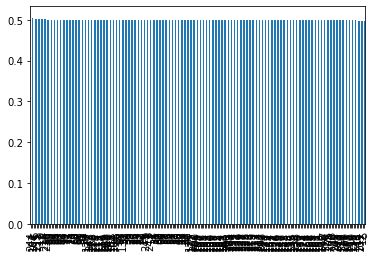

In [23]:
roc_values.plot.bar()

In [24]:
sel = roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [25]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

In [26]:
X_train_roc

,244,107,104,6,155,215,17,0,11,4,216
0,63200.700000,0.0,0.0,0.0,0.0,0.0,0.0,17282.0,0.0,0.0,0.0
1,88640.610000,0.0,0.0,0.0,0.0,0.0,0.0,38270.0,0.0,0.0,0.0
2,96314.160000,0.0,0.0,0.0,0.0,0.0,0.0,31526.0,0.0,0.0,0.0
3,117568.020000,0.0,0.0,0.0,0.0,0.0,0.0,38737.0,0.0,0.0,0.0
4,117310.979016,0.0,0.0,0.0,0.0,0.0,0.0,16469.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15995,53324.460000,0.0,0.0,0.0,0.0,0.0,0.0,38333.0,0.0,0.0,0.0
15996,56028.480000,0.0,0.0,0.0,0.0,0.0,0.0,26389.0,0.0,0.0,0.0
15997,38272.440000,0.0,0.0,0.0,0.0,0.0,0.0,2025.0,0.0,0.0,0.0
15998,117310.979016,0.0,0.0,0.0,0.0,0.0,0.0,17327.0,0.0,0.0,0.0


### Build the model and compare the performance

In [27]:
def run_randomForest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    print('Accuracy on test set:',accuracy_score(y_test,y_pred))

In [28]:
%%time
run_randomForest(X_train,X_test,y_train,y_test)

Accuracy on test set: 0.9345
Wall time: 3.18 s


In [29]:
%%time
run_randomForest(X_train_roc,X_test_roc,y_train,y_test)

Accuracy on test set: 0.9345
Wall time: 1.68 s


### Feature Selection based on RMSE in Regression

In [30]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

506 rows and 13 columns which predict the price of the house

In [33]:
X = pd.DataFrame(data=boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
y = boston.target

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [38]:
X_train.shape,X_test.shape

((339, 13), (167, 13))

In [41]:
mse = []
for feature in X_train.columns:
    reg = LinearRegression()
    reg.fit(X_train[feature].to_frame(),y_train)
    y_pred = reg.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test,y_pred))

In [42]:
mse

[69.26240787796779,
 74.37393927752248,
 66.24028082122223,
 78.19090442177692,
 66.31654707275109,
 44.60752894727369,
 71.2379279540329,
 75.52378447846974,
 71.55968579024415,
 65.96378496149188,
 70.48456313922603,
 70.81198707402534,
 38.973641340986354]

In [43]:
mse = pd.Series(mse,index=X_train.columns)
mse.sort_values(ascending=False, inplace=True)
mse

CHAS       78.190904
DIS        75.523784
ZN         74.373939
RAD        71.559686
AGE        71.237928
B          70.811987
PTRATIO    70.484563
CRIM       69.262408
NOX        66.316547
INDUS      66.240281
TAX        65.963785
RM         44.607529
LSTAT      38.973641
dtype: float64

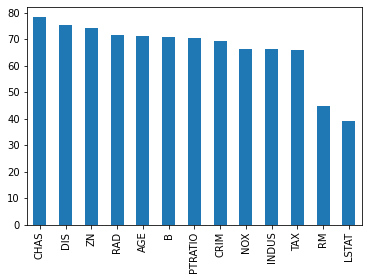

In [44]:
mse.plot.bar()

In [45]:
X_train_2 = X_train[['RM','LSTAT']]
X_test_2 = X_test[['RM','LSTAT']]

In [48]:
%%time
model = LinearRegression()
model.fit(X_train_2,y_train)
y_pred = model.predict(X_test_2)
print('r2_score:',r2_score(y_test,y_pred))
print('rmse',np.sqrt(mean_squared_error(y_test,y_pred)))
print('standard deviation of house price:',np.std(y))

r2_score: 0.607036950013075
rmse 5.628634064548942
standard deviation of house price: 9.188011545278203
Wall time: 6.98 ms


In [49]:
%%time
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('standard deviation of house price:',np.std(y))

r2_score: 0.6705795412578808
rmse: 5.153501900847671
standard deviation of house price: 9.188011545278203
Wall time: 9.12 ms


#### So you can see that if we take full features then r2_score is big value rather than r2_score after feature selection so feature selection improves accuracy that `always not True` but one benefit of feature selection is that it reduce training time because of less number of features